<a href="https://colab.research.google.com/github/bagasdal/bagasdal/blob/main/Rock_paper_scissor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rock paper scissor classification


Bagas Daliyanto

In [ ]:
import tensorflow as tf

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-07 13:39:51--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  14.8MB/s    in 20s     

2021-07-07 13:40:12 (15.3 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# zip file extract
import zipfile,os
file_location = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(file_location, 'r')
zip_ref.extractall('/tmp')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/tmp/rockpaperscissors.zip' mode='r'>>

In [ ]:
# get filename
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [ ]:
# remove unused file
os.remove('/tmp/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')

In [ ]:
# check file again
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'scissors', 'rock']

In [ ]:
# access file location
location_path = '/tmp/rockpaperscissors/rps-cv-images'

# populate data from file 
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(location_path):
    for name in files:
        full_path.append(os.path.join(path, name))
        tag.append(path.split('/')[-1])            
        file_name.append(name)

In [ ]:
import pandas as pd

# create data frame
df = pd.DataFrame({'path': full_path, 'file_name': file_name, 'tag': tag})

# check file size
df.groupby(['tag']).size()

tag
paper       712
rock        726
scissors    750
dtype: int64

In [ ]:
# check head file
df.head()

,path,file_name,tag
0,/tmp/rockpaperscissors/rps-cv-images/paper/JFO...,JFOcfFSm3Ul0Xkha.png,paper
1,/tmp/rockpaperscissors/rps-cv-images/paper/oWI...,oWI7JL85eXDhRFcV.png,paper
2,/tmp/rockpaperscissors/rps-cv-images/paper/prC...,prCirglnpqZ4KRmM.png,paper
3,/tmp/rockpaperscissors/rps-cv-images/paper/CnR...,CnRjJejRPD3QmYTl.png,paper
4,/tmp/rockpaperscissors/rps-cv-images/paper/Pwk...,PwkqvoT0noMITNaF.png,paper


In [ ]:
from sklearn.model_selection import train_test_split


# labelling data
X= df['path']
y= df['tag']

# split dataset with 0.4 validation test size
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.4, random_state=1)

NameError: ignored

In [ ]:
# create data frame
df_train = pd.DataFrame({'path': X_train, 'tag': y_train, 'set': 'train'})
df_val = pd.DataFrame({'path': X_val, 'tag': y_val, 'set': 'validation'})

# check dataframe size
print('train size', len(df_train))
print('val size', len(df_val))

# combine data frame
df_all = df_train.append([df_val]).reset_index(drop=1)
print('\n')
print(df_all.groupby(['set','tag']).size(),'\n')
print('\n')

df_all.sample(3)

train size 1312
val size 876


set         tag     
train       paper       423
            rock        434
            scissors    455
validation  paper       289
            rock        292
            scissors    295
dtype: int64 





,path,tag,set
203,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train
2037,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,validation
1085,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train


In [ ]:
# create file directory, take file path and copy file to destination path
import shutil
from tqdm.notebook import tqdm as tq

dataset_path = '/tmp/rockpaperscissors/dataset'

for index, row in tq(df_all.iterrows()):
    
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(location_path,row['tag'],row['image'].split('.')[0])            
    
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

In [ ]:
# image augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
# define Data flow
train_generator = train_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/dataset/train',
        target_size=(100, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle = True)
 
validation_generator = val_datagen.flow_from_directory(
        '/tmp/rockpaperscissors/dataset/validation',
        target_size=(100, 150),
        batch_size=20,
        class_mode='categorical',
        shuffle = True)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# create CNN model
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
        ])

In [ ]:
# Model compile
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(1e-3),
              metrics=['accuracy'])

# define callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)

In [ ]:
# train model
history = model.fit(
            train_generator,
            steps_per_epoch=len(train_generator),
            epochs=10,
            validation_data=validation_generator,
            validation_steps=len(validation_generator),
            verbose=1,
            callbacks = [early_stopping_cb]
            )

Epoch 1/10
66/66 [==============================] - 41s 612ms/step - loss: 0.2102 - accuracy: 0.9337 - val_loss: 0.1954 - val_accuracy: 0.9338
Epoch 2/10
66/66 [==============================] - 40s 609ms/step - loss: 0.1666 - accuracy: 0.9474 - val_loss: 0.1110 - val_accuracy: 0.9612
Epoch 3/10
66/66 [==============================] - 40s 610ms/step - loss: 0.1538 - accuracy: 0.9535 - val_loss: 0.0813 - val_accuracy: 0.9703
Epoch 4/10
66/66 [==============================] - 40s 609ms/step - loss: 0.1360 - accuracy: 0.9489 - val_loss: 0.1154 - val_accuracy: 0.9600
Epoch 5/10
66/66 [==============================] - 40s 609ms/step - loss: 0.1058 - accuracy: 0.9665 - val_loss: 0.0603 - val_accuracy: 0.9783
Epoch 6/10
66/66 [==============================] - 40s 611ms/step - loss: 0.0787 - accuracy: 0.9748 - val_loss: 0.0547 - val_accuracy: 0.9772
Epoch 7/10
66/66 [==============================] - 40s 612ms/step - loss: 0.0785 - accuracy: 0.9703 - val_loss: 0.1031 - val_accuracy: 0.9635

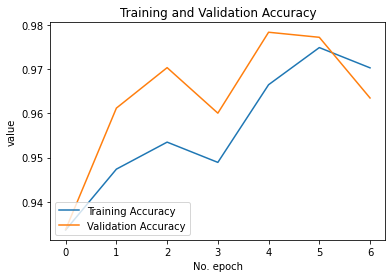

In [ ]:
# accuracy visualization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="lower left")
plt.show()

Hasil Prediksi:  Paper


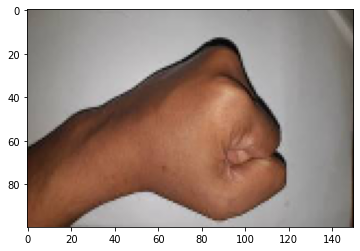

In [ ]:
# predicting image
import numpy as np
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
fn = 'Contoh_Rock_1.jpg'
 
path = fn
img = image.load_img(path, target_size=(100,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])

im_array = np.asarray(images)
im_array = im_array*(1/225)
im_input = tf.reshape(im_array, shape = [1, 100, 150, 3])

predict_class = np.argmax(model.predict(im_input))
  
if predict_class == 0:
  predict_label = 'Paper'
elif predict_class == 1:
  predict_label = 'Rock'
else:
  predict_label = 'Scissor'

print('Hasil Prediksi: ', predict_label)

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

xs = np.array([1.0,  2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([4.0, 6.0, 8.0, 10.0, 12.0, 14.0], dtype=float)

In [ ]:
# model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model = tf.keras.Sequential([
                             keras.layers.Dense(units=1, input_shape=[1]),
                             keras.layers.Dense(units=8),
                             keras.layers.Dense(units=1)])

model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=150)

Epoch 1/150
1/1 [==============================] - 0s 218ms/step - loss: 119.1852
Epoch 2/150
1/1 [==============================] - 0s 8ms/step - loss: 55.3566
Epoch 3/150
1/1 [==============================] - 0s 9ms/step - loss: 25.8134
Epoch 4/150
1/1 [==============================] - 0s 6ms/step - loss: 12.1385
Epoch 5/150
1/1 [==============================] - 0s 6ms/step - loss: 5.8080
Epoch 6/150
1/1 [==============================] - 0s 5ms/step - loss: 2.8767
Epoch 7/150
1/1 [==============================] - 0s 4ms/step - loss: 1.5186
Epoch 8/150
1/1 [==============================] - 0s 8ms/step - loss: 0.8886
Epoch 9/150
1/1 [==============================] - 0s 9ms/step - loss: 0.5957
Epoch 10/150
1/1 [==============================] - 0s 5ms/step - loss: 0.4588
Epoch 11/150
1/1 [==============================] - 0s 5ms/step - loss: 0.3941
Epoch 12/150
1/1 [==============================] - 0s 5ms/step - loss: 0.3629
Epoch 13/150
1/1 [==============================] - 0s

In [ ]:
print(model.predict([10.0]))

[[23.065119]]
